# Aquatic Toxicity Analysis
**Author**: Agustín Arturo Melian Su

**Date**: 31/10/2025

**Reference**:
Cassotti et al. (2014), Prediction of Acute Aquatic Toxicity Toward Daphnia magna by using the GA-kNN Method, Alternatives to Laboratory Animals Volume 42, Issue 1, March 2014

In [14]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# Load data
df_raw = pd.read_csv('../data/raw/qsar_aquatic_toxicity(1).csv', sep=';', header=None)

df_raw.columns = ['TPSA','SAcc','H050','MLOGP','RDCH','GATS1p','nN','C040','LC50'] 
df_raw.sample(10)

,TPSA,SAcc,H050,MLOGP,RDCH,GATS1p,nN,C040,LC50
356,57.53,110.512,2,1.643,2.090,0.814,0,1,3.068
467,26.30,36.145,0,0.586,1.577,1.881,0,1,2.090
211,0.00,0.000,0,1.672,1.225,0.562,0,0,3.280
328,37.30,67.828,1,3.696,3.117,1.149,0,0,5.170
414,0.00,0.000,0,3.958,2.488,0.802,0,0,3.575
286,74.57,132.193,2,1.671,3.501,1.095,3,1,3.742
489,46.53,78.828,1,2.758,2.856,1.022,0,1,3.794
504,26.02,32.897,2,3.617,2.074,0.288,1,0,5.559
331,41.13,61.166,2,-1.095,1.726,1.463,2,0,1.188
512,32.67,45.055,0,3.355,3.097,0.889,2,1,4.821


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TPSA    546 non-null    float64
 1   SAcc    546 non-null    float64
 2   H050    546 non-null    int64  
 3   MLOGP   546 non-null    float64
 4   RDCH    546 non-null    float64
 5   GATS1p  546 non-null    float64
 6   nN      546 non-null    int64  
 7   C040    546 non-null    int64  
 8   LC50    546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


| **Descriptor** | **Meaning / Definition** |
|----------------|--------------------------|
| **TPSA(tot)** | Represents exposed molecular polarity. |
| **SAacc** | Van der Waals surface area (VSA) of atoms that are hydrogen bond acceptors |
| **H-050** | Nubmber of hydrogen atoms bonded to heteroatoms |
| **MLOGP** | Octanol–water partition coefficient (LogP) from the Moriguchi model|
| **RDCHI** | Topological index describing molecular size and branching, indirectly related to lipophilicity. |
| **GATS1p** | Geary autocorrelation descriptor weighted by atomic polarizability |
| **nN** | Number of nitrogen atoms in the molecule |
| **C-040** | Number of carbon atoms in groups |
| **LC50** | lethal concentration threshold |

In [7]:
# Preprocessing
df_baking = df_raw.copy()

df_baking.columns = df_baking.columns.str.lower()

df = df_baking.copy()

In [29]:
# EDA
df_train, df_test = train_test_split(df, test_size=0.2, random_state=2025)

df_train.shape, df_test.shape

((436, 9), (110, 9))

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
tpsa,370.0,46.690676,45.417366,0.000,12.89000,38.6300,66.05000,347.320
sacc,370.0,58.752792,67.613119,0.000,11.00000,42.6830,77.49275,571.952
h050,370.0,0.937838,1.536873,0.000,0.00000,0.0000,1.00000,18.000
mlogp,370.0,2.273149,1.707575,-6.446,1.21375,2.2600,3.37400,9.148
rdch,370.0,2.468541,0.827791,1.000,1.96375,2.2965,2.90250,6.439
gats1p,370.0,1.052489,0.400442,0.281,0.74350,1.0275,1.25000,2.500
nn,370.0,0.916216,1.315328,0.000,0.00000,0.0000,1.00000,11.000
c040,370.0,0.348649,0.858600,0.000,0.00000,0.0000,0.00000,11.000
lc50,370.0,4.543184,1.590207,0.122,3.58750,4.4080,5.51275,10.047


Features such as tpsa, sacc, h050, nn and c040 seem highly positively skewed. As well, ranges and magnitudes differ drastically, thus, the type of model selected will determine if the data needs any transformation and/or standarization.

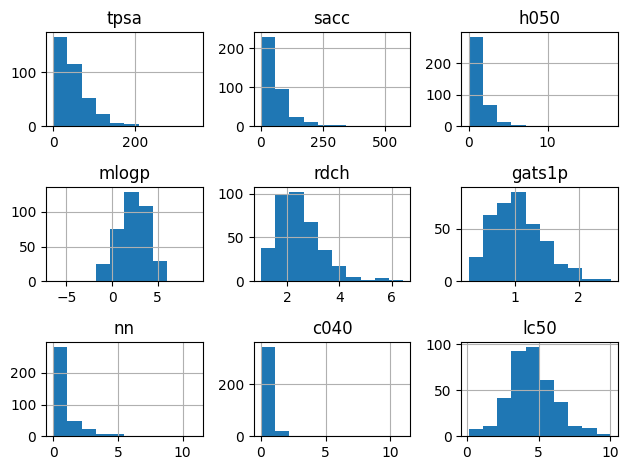

In [10]:
df_train.hist()
plt.tight_layout()
plt.show()

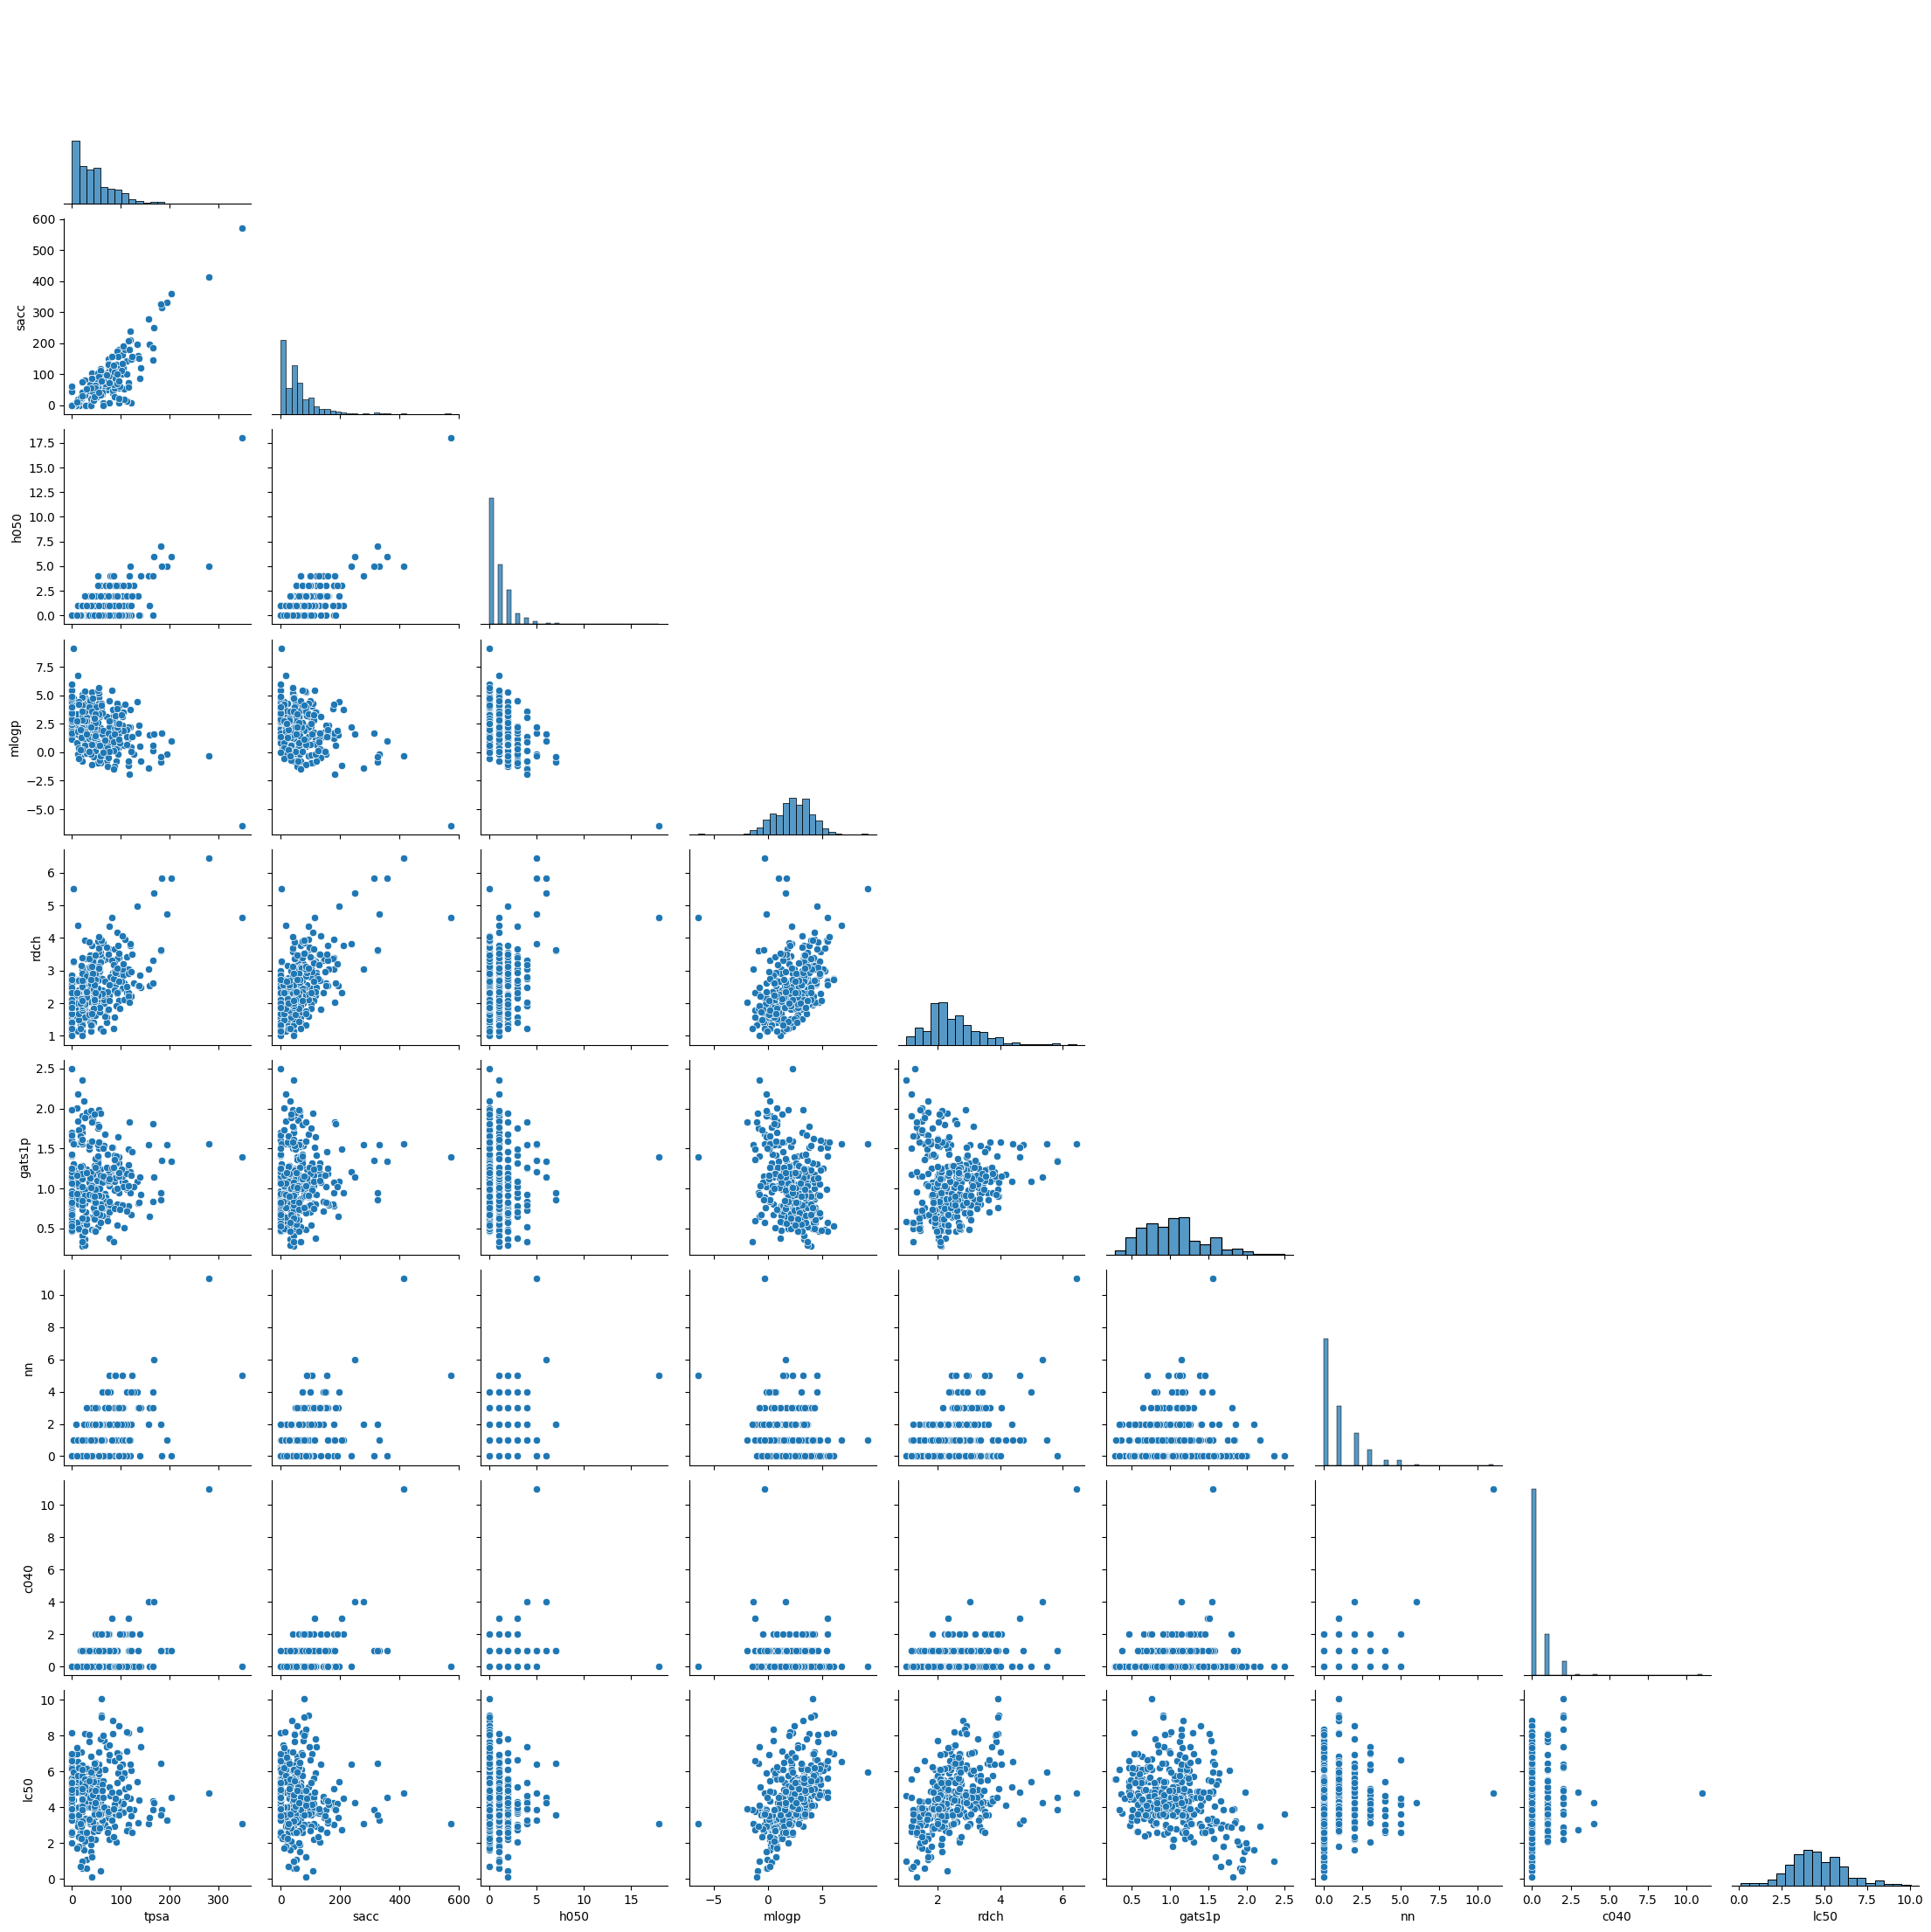

In [12]:
sns.pairplot(df_train, corner=True)
plt.show()

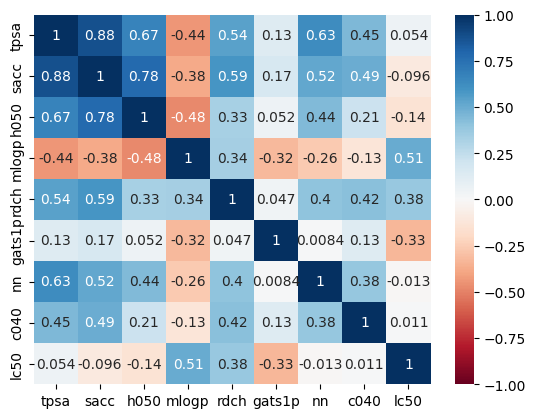

In [13]:
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.show()

There is high correlation between some variables, therefore a linear regression model might not be the most optimal one. 

In this project, four main models will be compared:

- Ridge
- KNN
- Random Forest
- Histogram Boosting

For these models, transformation and normalization will be performed. 

In [39]:
# Save processed data
df_train.to_csv('../data/processed/df_train.csv', index=False)
df_test.to_csv('../data/processed/df_test.csv', index=False)
df_val.to_csv('../data/processed/df_val.csv', index=False)